In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

C:\Users\sytechno\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


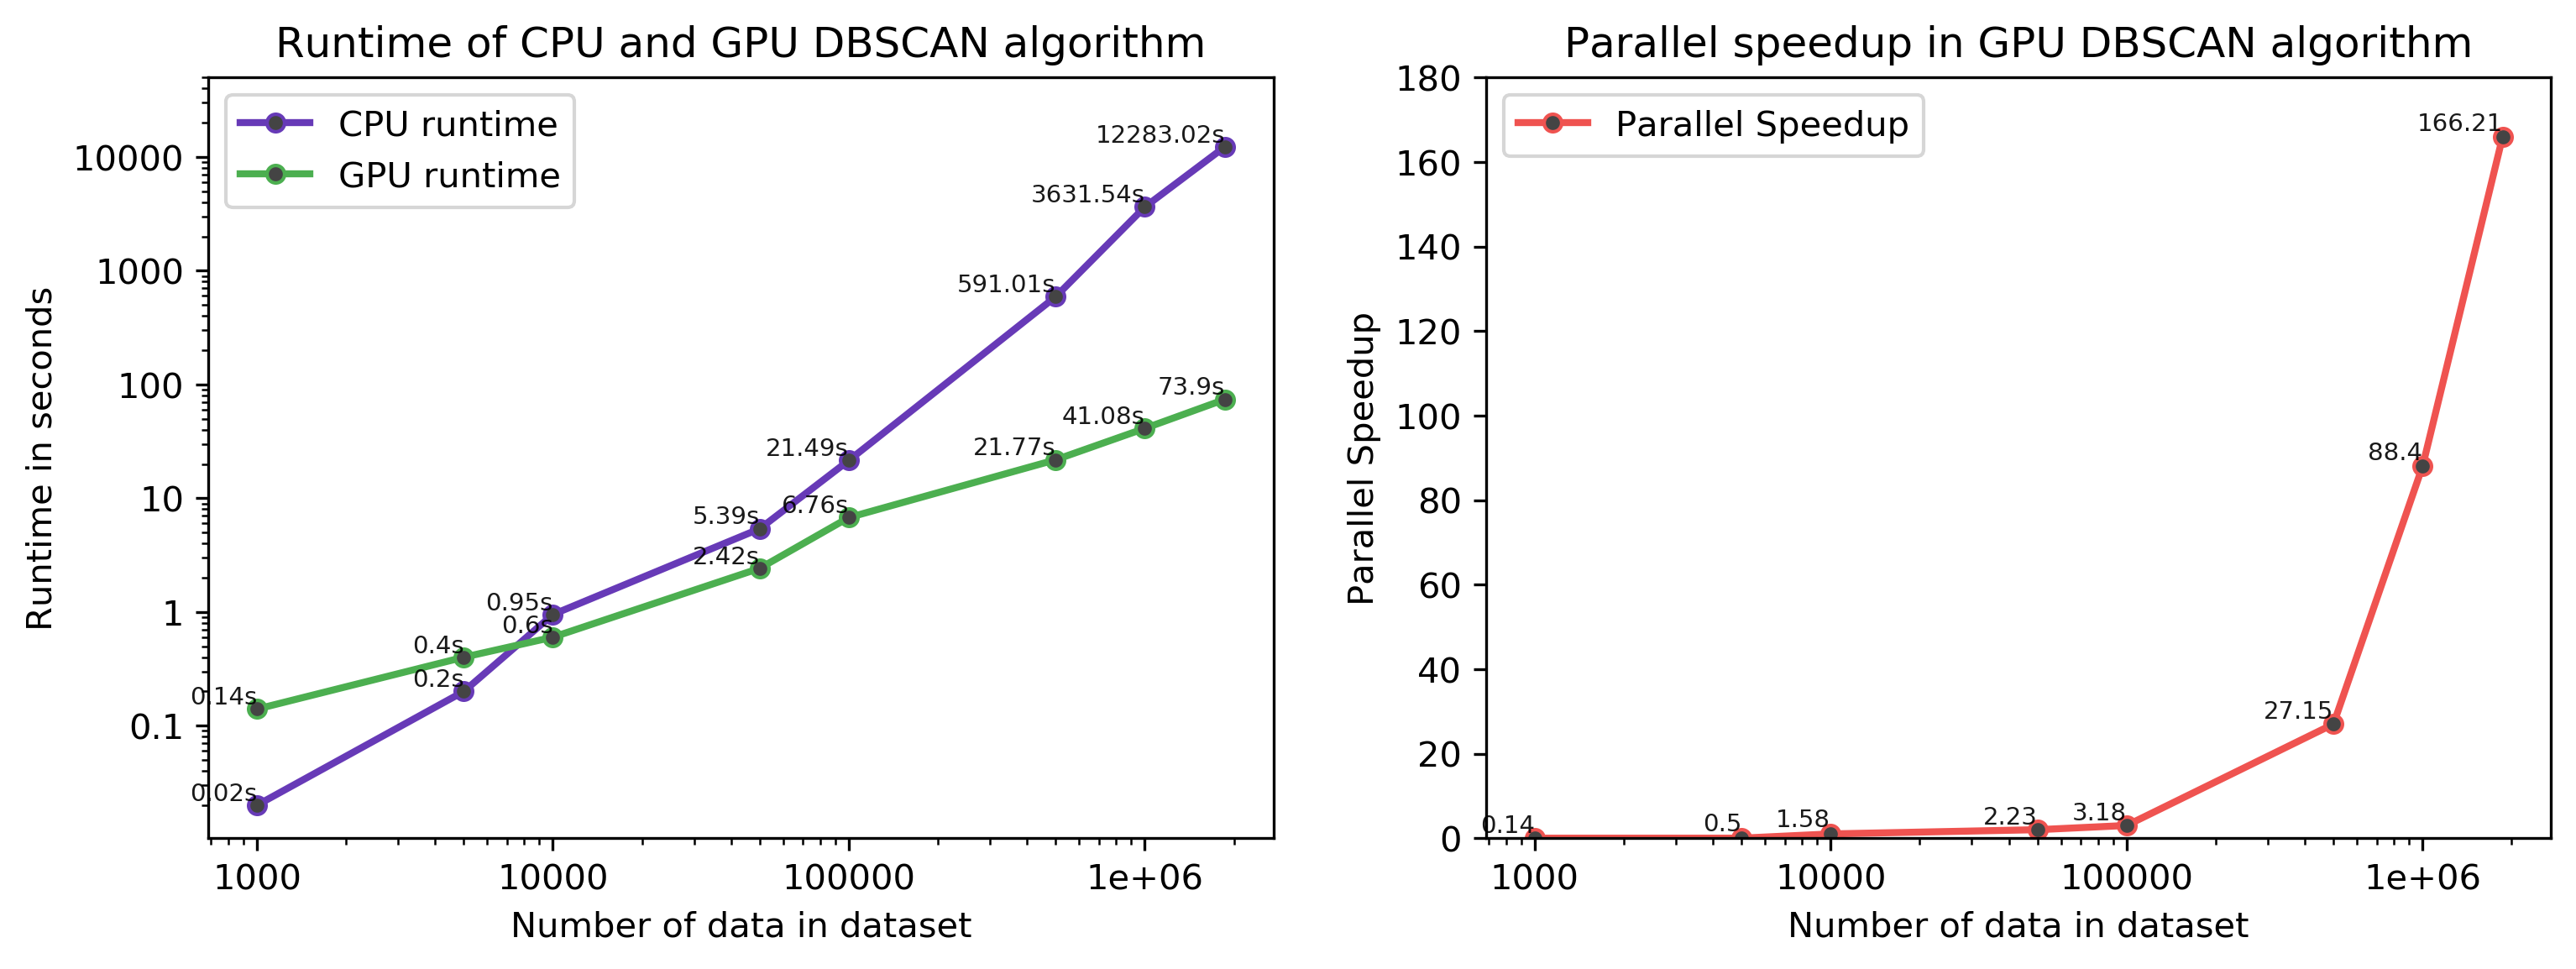

In [93]:
import matplotlib.ticker as ticker

# Runtime plot
plt.rcParams.update({'font.size': 10, 'axes.titlesize': 12, 'legend.loc': 'upper left'})
fig, axs = plt.subplots(1, 2, figsize=(12, 4), dpi=300)

dataset_count = [1000, 5000, 10000, 50000, 100000, 500000, 1000000, 1864620]
cpu_runtime = [0.02, 0.20, 0.95, 5.39, 21.49, 591.01, 3631.54, 12283.02]
gpu_runtime = [0.14, 0.40, 0.60, 2.42, 6.76, 21.77, 41.08, 73.9]
speedup = [round(cpu_rt/gpu_runtime[i], 2) for i, cpu_rt in enumerate(cpu_runtime)]
speedup_int = [int(sup) for sup in speedup]

axs[0].plot(dataset_count, cpu_runtime, label="CPU runtime", color='#673ab7', marker='o',
         linewidth=2, markersize=5, markerfacecolor='#444444')
for i in range(0, len(cpu_runtime)):
    label = str(cpu_runtime[i]) + "s"
    axs[0].annotate(label, (dataset_count[i],cpu_runtime[i]), ha='right', va='bottom', fontsize=7, alpha=0.9)
    
axs[0].plot(dataset_count, gpu_runtime, label="GPU runtime", color='#4caf50', marker='o',
         linewidth=2, markersize=5, markerfacecolor='#444444')
for i in range(0, len(gpu_runtime)):
    label = str(gpu_runtime[i]) + "s"
    axs[0].annotate(label, (dataset_count[i], gpu_runtime[i]), ha='right', va='bottom', fontsize=7, alpha=0.9)

axs[0].set_ylabel("Runtime in seconds")
axs[0].set_xlabel("Number of data in dataset")
axs[0].set_title("Runtime of CPU and GPU DBSCAN algorithm")
axs[0].set_yscale('log')
axs[0].set_ylim(0, 50000)
axs[0].set_xscale('log')

axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

axs[0].legend()
axs[1].plot(dataset_count, speedup_int, label="Parallel Speedup", color='#ef5350', marker='o',
         linewidth=2, markersize=5, markerfacecolor='#444444')
for i in range(0, len(speedup)):
    label = str(speedup[i])
    axs[1].annotate(label, (dataset_count[i], speedup[i]), ha='right', va='bottom', fontsize=7, alpha=0.9)  

axs[1].set_ylabel("Parallel Speedup")
axs[1].set_xlabel("Number of data in dataset")
axs[1].set_title("Parallel speedup in GPU DBSCAN algorithm")
axs[1].set_xscale('log')
axs[1].set_ylim(0, 180)

axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

axs[1].legend()

figname = 'cuda_runtime'
plt.savefig(figname+'.png', bbox_inches='tight', dpi=300)
plt.show()

C:\Users\sytechno\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


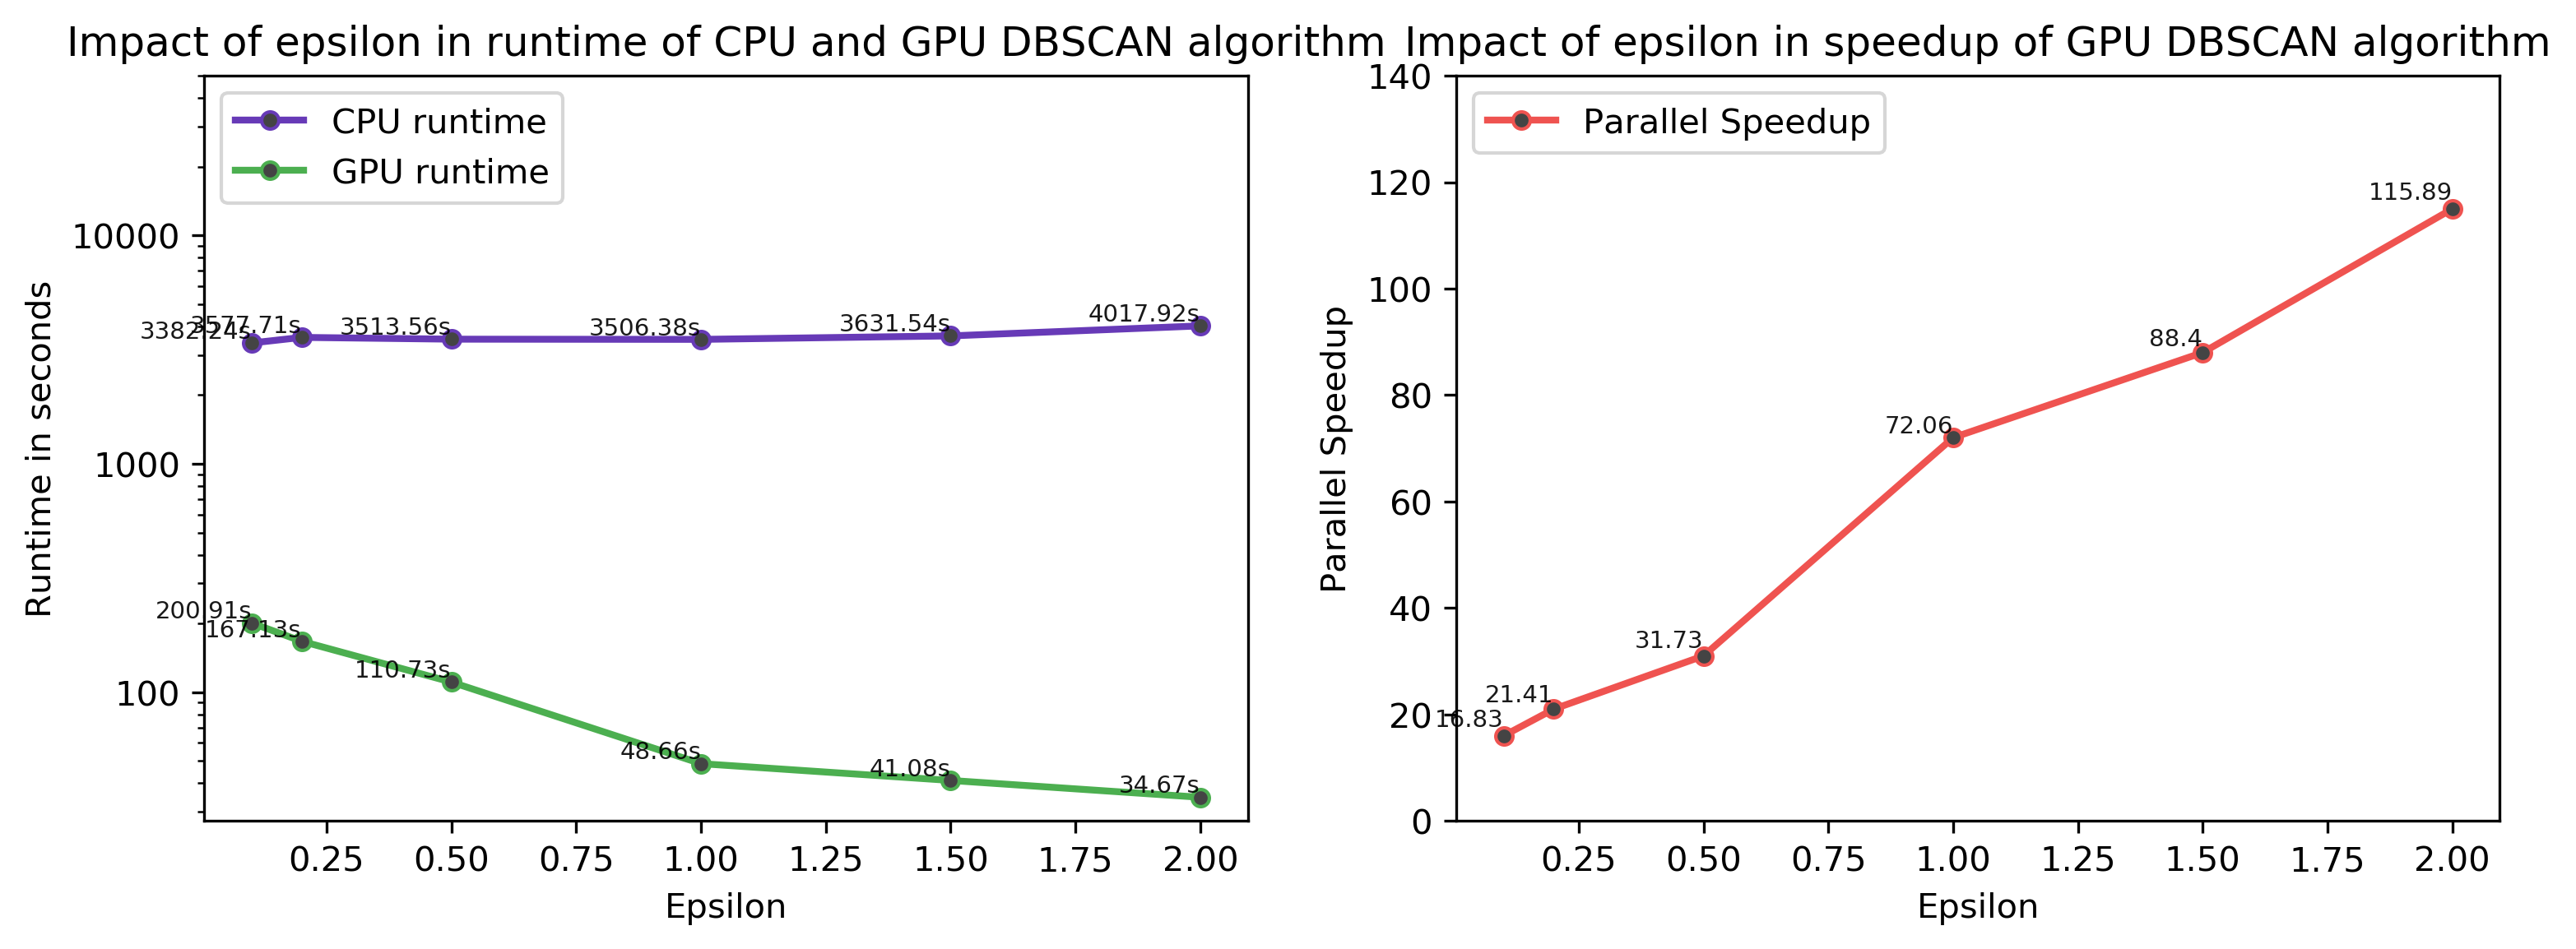

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), dpi=300)

epsilons = [0.1, 0.2, 0.5, 1, 1.5, 2]
cpu_runtime = [3382.24, 3577.71, 3513.56, 3506.38, 3631.54, 4017.92]
gpu_runtime = [200.91, 167.13, 110.73, 48.66, 41.08, 34.67]

speedup = [round(cpu_rt/gpu_runtime[i], 2) for i, cpu_rt in enumerate(cpu_runtime)]
speedup_int = [int(sup) for sup in speedup]

axs[0].plot(epsilons, cpu_runtime, label="CPU runtime", color='#673ab7', marker='o',
         linewidth=2, markersize=5, markerfacecolor='#444444')

for i in range(0, len(cpu_runtime)):
    label = str(cpu_runtime[i]) + "s"
    axs[0].annotate(label, (epsilons[i],cpu_runtime[i]), ha='right', va='bottom', fontsize=7, alpha=0.9)
    
axs[0].plot(epsilons, gpu_runtime, label="GPU runtime", color='#4caf50', marker='o',
         linewidth=2, markersize=5, markerfacecolor='#444444')
for i in range(0, len(gpu_runtime)):
    label = str(gpu_runtime[i]) + "s"
    axs[0].annotate(label, (epsilons[i], gpu_runtime[i]), ha='right', va='bottom', fontsize=7, alpha=0.9)

axs[0].set_ylabel("Runtime in seconds")
axs[0].set_xlabel("Epsilon")
axs[0].set_title("Impact of epsilon in runtime of CPU and GPU DBSCAN algorithm")
axs[0].set_yscale('log')
axs[0].set_ylim(0, 50000)
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
axs[0].legend()
axs[1].plot(epsilons, speedup_int, label="Parallel Speedup", color='#ef5350', marker='o',
         linewidth=2, markersize=5, markerfacecolor='#444444')
for i in range(0, len(speedup)):
    label = str(speedup[i])
    axs[1].annotate(label, (epsilons[i], speedup[i]), ha='right', va='bottom', fontsize=7, alpha=0.9)  

axs[1].set_ylabel("Parallel Speedup")
axs[1].set_xlabel("Epsilon")
axs[1].set_title("Impact of epsilon in speedup of GPU DBSCAN algorithm")
axs[1].set_ylim(0, 140)

axs[1].legend()

figname = 'epsilon_impact'
plt.savefig(figname+'.png', bbox_inches='tight', dpi=300)
plt.show()

C:\Users\sytechno\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


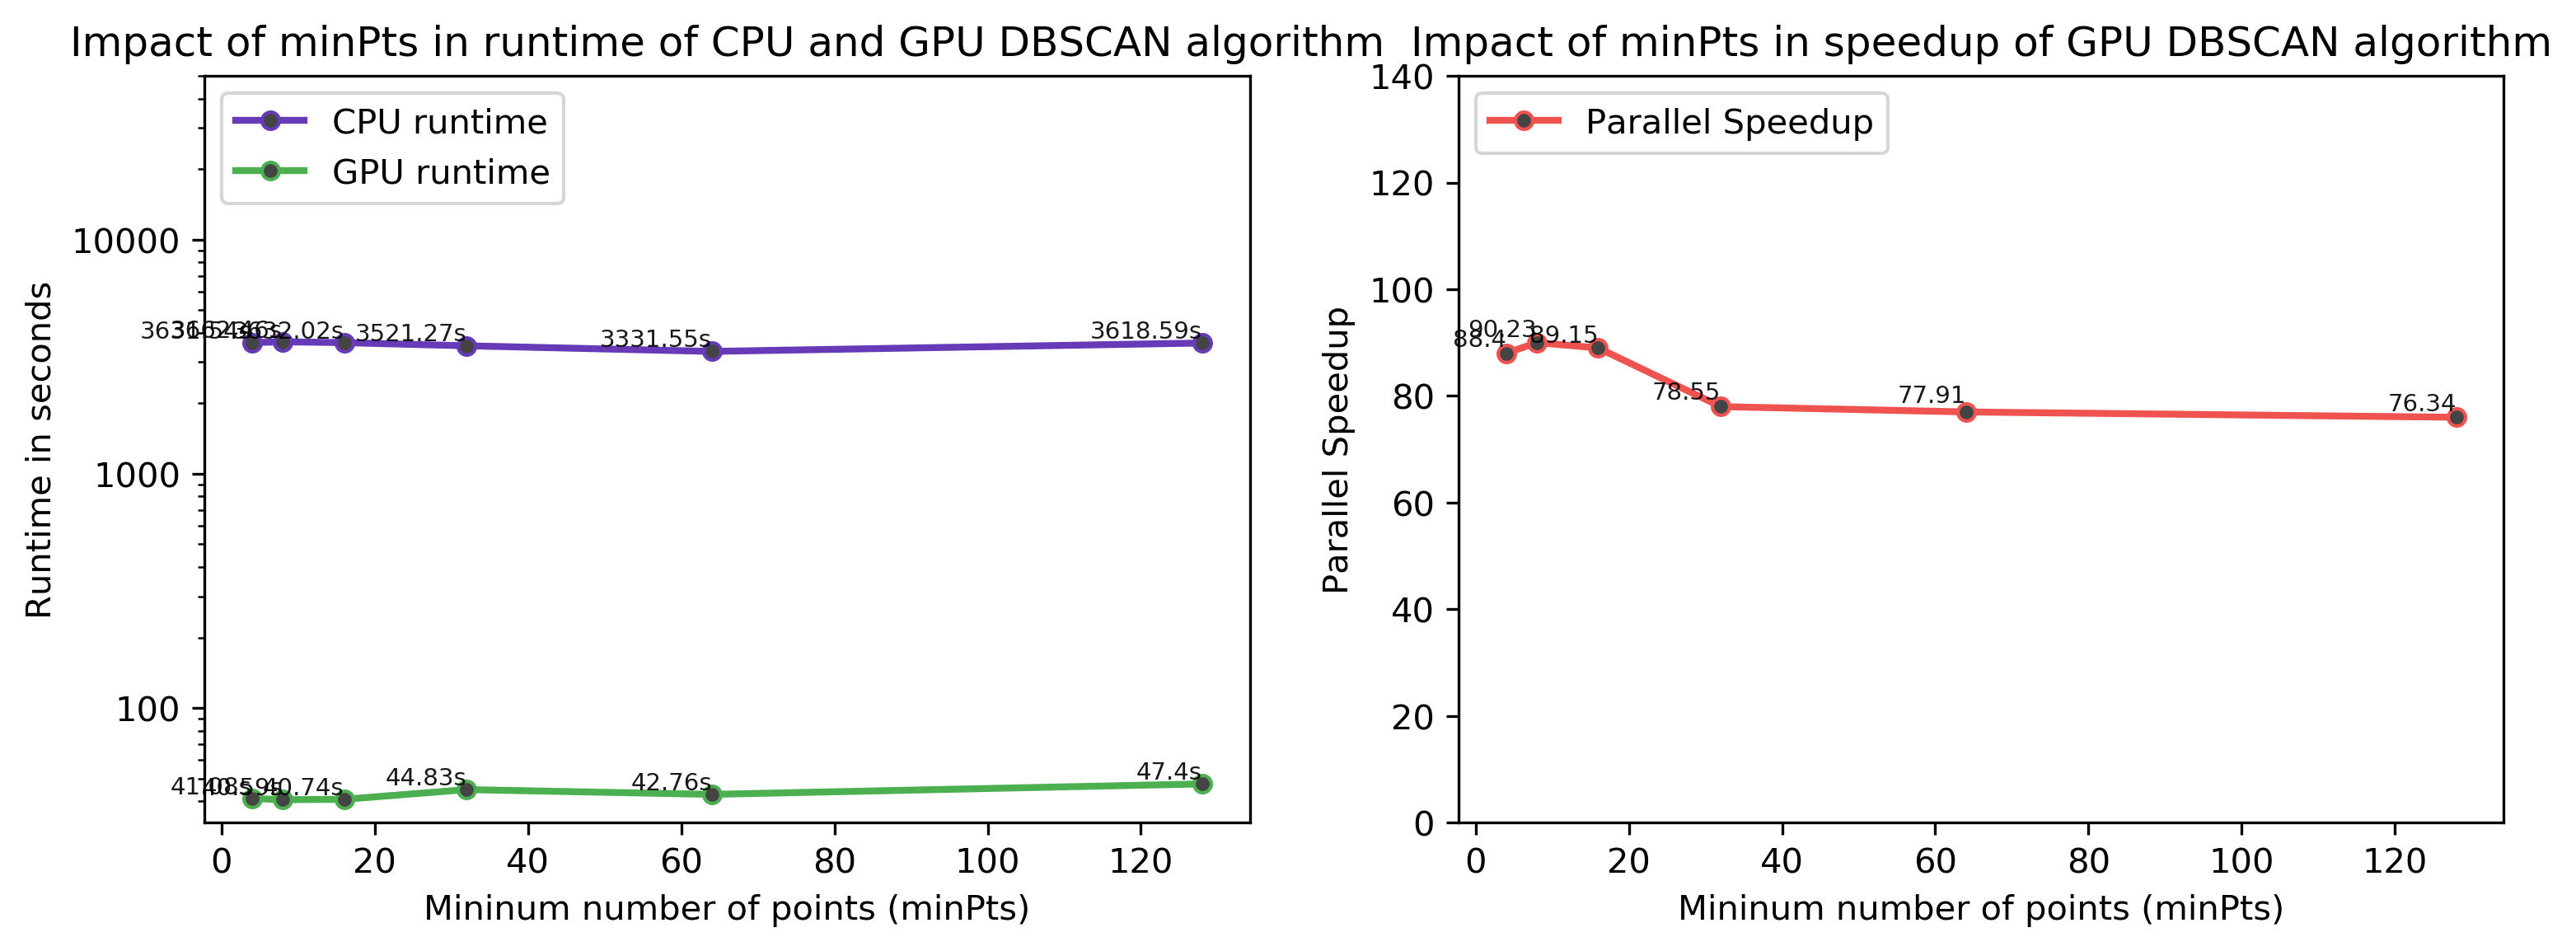

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), dpi=300)

minpts = [4, 8, 16, 32, 64, 128]
cpu_runtime = [3631.54, 3662.46, 3632.02, 3521.27, 3331.55, 3618.59]
gpu_runtime = [41.08, 40.59, 40.74, 44.83, 42.76, 47.4]
speedup = [round(cpu_rt/gpu_runtime[i], 2) for i, cpu_rt in enumerate(cpu_runtime)]
speedup_int = [int(sup) for sup in speedup]

axs[0].plot(minpts, cpu_runtime, label="CPU runtime", color='#673ab7', marker='o',
         linewidth=2, markersize=5, markerfacecolor='#444444')

for i in range(0, len(cpu_runtime)):
    label = str(cpu_runtime[i]) + "s"
    axs[0].annotate(label, (minpts[i],cpu_runtime[i]), ha='right', va='bottom', fontsize=7, alpha=0.9)
    
axs[0].plot(minpts, gpu_runtime, label="GPU runtime", color='#4caf50', marker='o',
         linewidth=2, markersize=5, markerfacecolor='#444444')
for i in range(0, len(gpu_runtime)):
    label = str(gpu_runtime[i]) + "s"
    axs[0].annotate(label, (minpts[i], gpu_runtime[i]), ha='right', va='bottom', fontsize=7, alpha=0.9)

axs[0].set_ylabel("Runtime in seconds")
axs[0].set_xlabel("Mininum number of points (minPts)")
axs[0].set_title("Impact of minPts in runtime of CPU and GPU DBSCAN algorithm")
axs[0].set_yscale('log')
axs[0].set_ylim(0, 50000)

axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

axs[0].legend()
axs[1].plot(minpts, speedup_int, label="Parallel Speedup", color='#ef5350', marker='o',
         linewidth=2, markersize=5, markerfacecolor='#444444')
for i in range(0, len(speedup)):
    label = str(speedup[i])
    axs[1].annotate(label, (minpts[i], speedup[i]), ha='right', va='bottom', fontsize=7, alpha=0.9)  

axs[1].set_ylabel("Parallel Speedup")
axs[1].set_xlabel("Mininum number of points (minPts)")
axs[1].set_title("Impact of minPts in speedup of GPU DBSCAN algorithm")
axs[1].set_ylim(0, 140)

axs[1].legend()

figname = 'minpts_impact'
plt.savefig(figname+'.png', bbox_inches='tight', dpi=300)
plt.show()

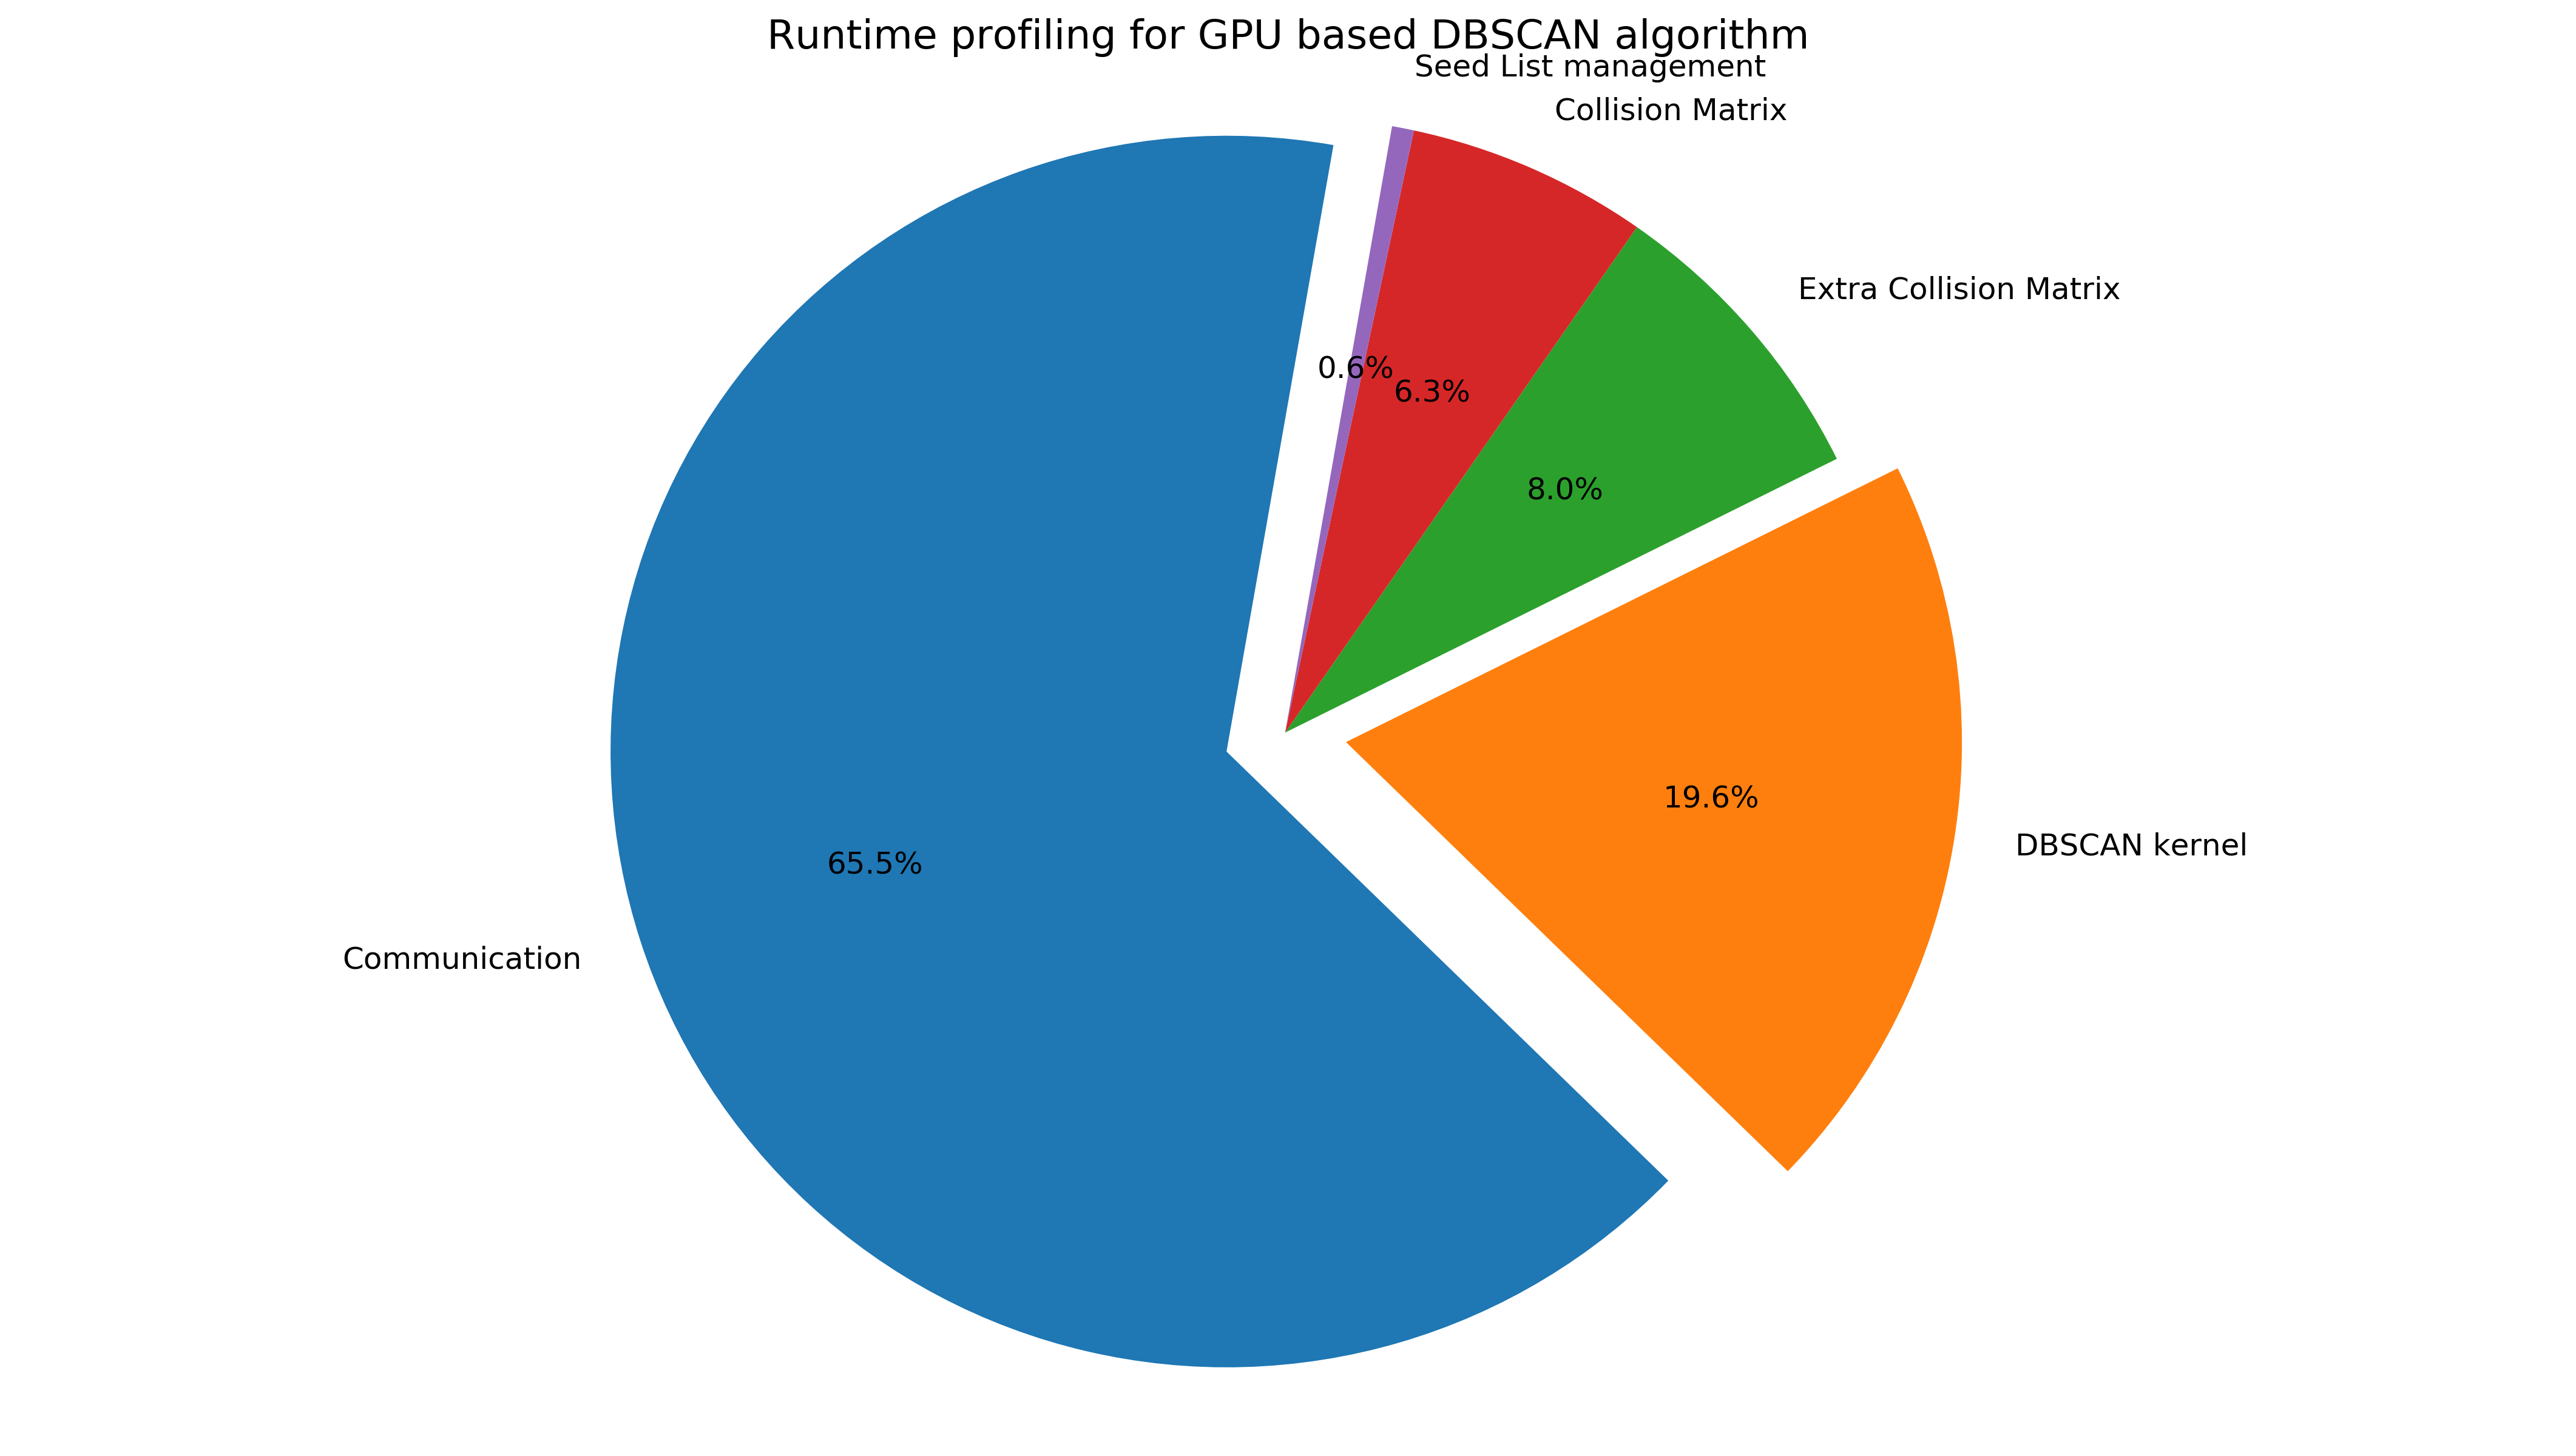

In [89]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 16, 'legend.loc': 'upper left'})


fig, axs = plt.subplots(1, 1, figsize=(18, 10), dpi=300)

executionTimes = [("Communication", 22.79), ('DBSCAN kernel', 6.82), ('Extra Collision Matrix', 2.78),
                  ('Collision Matrix', 2.20), ('Seed List management', 0.20)]

executionTimesLabels = [key for key, val in executionTimes]

sizes = [val for key, val in executionTimes]

explode = [0.1 if index < 2 else 0 for index in range(0, len(executionTimesLabels))]

axs.pie(sizes, explode=explode, labels=executionTimesLabels, autopct='%1.1f%%',
        startangle=80)
axs.axis('equal')
axs.set_title("Runtime profiling for GPU based DBSCAN algorithm")

figname = 'runtime_profiling'
plt.savefig(figname+'.png', bbox_inches='tight', dpi=300)

plt.show()